In [1]:
import gensim
isReload = int(input("Type 1 to initiate reload of google word2vec: "))

if isReload:
    model_word2vec_temp = gensim.models.KeyedVectors.load_word2vec_format('/home/owner/デスクトップ/milnet+edu/GoogleNews-vectors-negative300.bin', binary=True)  
    model_word2vec = model_word2vec_temp

print('word2vec model loaded')


Type 1 to initiate reload of google word2vec: 0
word2vec model loaded


In [1]:
import sys, os
sys.path.append(os.pardir)

os.environ["KERAS_BACKEND"]='tensorflow'
#import glob
import numpy as np


import keras
from keras.layers import Input, merge
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
import keras.backend as K
from keras.layers import Lambda, regularizers, Average

from keras.models import Model
from keras.layers import Input, Conv2D, Conv1D, MaxPooling2D, GlobalMaxPooling2D, GlobalMaxPooling1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import GRU
from keras.layers.wrappers import Bidirectional, TimeDistributed
from keras.layers.core import Dropout, Dense, Lambda, Masking
from keras.layers import merge, Layer, Activation, Dot, Concatenate, Flatten, Lambda

from keras.initializers import Identity,glorot_normal
from keras import regularizers
from keras import optimizers
from keras import initializers
from keras import metrics

from keras.utils import plot_model



/home/owner/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/owner/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
x_test = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/test_data_features.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/t_train.npy')
y_test = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/test_data_labels.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/t_test.npy')
print(x_test)
print(x_test.shape)


[[[     0      0      0 ...    548    321   3051]
  [     0      0      0 ...     14  70882   8352]
  [     0      0      0 ...    138   4096  10904]
  ...
  [     0      0      0 ...    639     92    809]
  [     0      0      0 ...     87  75740  12823]
  [     0    162 572747 ...     11   1107    692]]

 [[     0      0      0 ...      0      0     88]
  [     0      0      0 ...      0     14   2570]
  [     0      0      0 ...     19   1197   8002]
  ...
  [     0      0      0 ...      0      0      0]
  [     0      0      0 ...      0      0      0]
  [     0      0      0 ...      0      0      0]]

 [[     0      0      0 ...   1121     39   2091]
  [     0      0      0 ...     42  11094    529]
  [     0      0      0 ...     11    636   4879]
  ...
  [     0      0      0 ...      0      0      0]
  [     0      0      0 ...      0      0      0]
  [     0      0      0 ...      0      0      0]]

 ...

 [[     0      0      0 ...     11     65    466]
  [     0      0    

In [2]:
x_train = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/train_data_features.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/x_train_sort.npy')
y_train = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/train_data_scores_binary.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/x_test_sort.npy')

x_test = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/test_data_features.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/t_train.npy')
y_test = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/test_data_scores_binary.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/t_test.npy')

x_valid = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/validation_data_features.npy')
y_valid = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/validation_data_scores_binary.npy')

train_idx = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/train_data_idx_binary_only.npy')
test_idx = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/test_data_idx_binary_only.npy')
valid_idx = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/validation_data_idx_binary_only.npy')

#print(len(train_idx))
x_train = x_train[train_idx]
#y_train = y_train[train_idx]
#print(len(x_train))
#print(len(y_train))

x_test = x_test[test_idx]
#y_test = y_test[test_idx]

x_valid = x_valid[valid_idx]
#y_valid = y_valid[valid_idx]

print(len(x_valid))

word_idx=np.load( '/home/owner/デスクトップ/milnet+edu/data/Preprocessed/' + 'vocab_idx.npy')
#print(idx)
embWeights=np.load( '/home/owner/デスクトップ/milnet+edu/data/Preprocessed/' + 'weights.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/weights.npy')

print(len(word_idx))
print(x_test)

print('data loaded')

25206
61560
[[[     0      0      0 ...    548    321   3051]
  [     0      0      0 ...     14  70882   8352]
  [     0      0      0 ...    138   4096  10904]
  ...
  [     0      0      0 ...    639     92    809]
  [     0      0      0 ...     87  75740  12823]
  [     0    162 572747 ...     11   1107    692]]

 [[     0      0      0 ...      0      0     88]
  [     0      0      0 ...      0     14   2570]
  [     0      0      0 ...     19   1197   8002]
  ...
  [     0      0      0 ...      0      0      0]
  [     0      0      0 ...      0      0      0]
  [     0      0      0 ...      0      0      0]]

 [[     0      0      0 ...   1121     39   2091]
  [     0      0      0 ...     42  11094    529]
  [     0      0      0 ...     11    636   4879]
  ...
  [     0      0      0 ...      0      0      0]
  [     0      0      0 ...      0      0      0]
  [     0      0      0 ...      0      0      0]]

 ...

 [[     0      0      0 ...     11     65    466]
  [     

In [3]:
features = x_valid
print(len(features))
for i in range(len(features)):
    #print(len(features[i]))
    if len(features[i])!=40:
            print('i:'+str(i)+'   ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;')
            print(len(features[i]))
            x_valid[i].append(x_valid[i][-1])
    for j in range(len(features[i])):
        
        #print(len(features[i][j]))
        if len(features[i][j])!= 15:
            print('i:'+str(i)+'j:'+str(j)+'   ************************************************************')

25206
i:25205   ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
39


In [4]:
x_valid=np.asarray(x_valid.tolist())

In [5]:
max_text_num, max_text_len = x_train[0].shape[0], x_train[0].shape[1]

embedding_layer = Embedding( input_dim=embWeights.shape[0], output_dim=embWeights.shape[1], weights=[embWeights]
                      ,mask_zero=True , trainable=True, embeddings_regularizer=regularizers.l2(0.0000001)
                      , input_length=max_text_len, name='Embedding' )
##

class AttLayer(Layer):
    def __init__(self, **kwargs):
        self.init = initializers.get('normal')
        #self.input_spec = [InputSpec(ndim=3)]
        super(AttLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape)==3
        #self.W = self.init((input_shape[-1],1))
        self.W = self.init((input_shape[-1],))
        #self.input_spec = [InputSpec(shape=input_shape)]
        self.trainable_weights = [self.W]
        super(AttLayer, self).build(input_shape)  # be sure you call this somewhere!

    def call(self, x, mask=None):
        eij = K.tanh(K.dot(x, self.W))
        
        ai = K.exp(eij)
        weights = ai/K.sum(ai, axis=1).dimshuffle(0,'x')
        
        weighted_input = x*weights.dimshuffle(0,1,'x')#.decode('utf-8')
        print(weighted_input)
        return weighted_input.sum(axis=1)

    def get_output_shape_for(self, input_shape):
        return (input_shape[0], input_shape[-1])

sentence_input = Input(shape=(max_text_len,), dtype='int32')
embedded_sequences = embedding_layer(sentence_input)
l_lstm = Bidirectional(GRU(100, return_sequences=True))(embedded_sequences)
l_dense = TimeDistributed(Dense(200))(l_lstm)
l_att = AttLayer()(l_dense)
sentEncoder = Model(sentence_input, l_att)

review_input = Input(shape=(max_text_num, max_text_len ), dtype='int32')
review_encoder = TimeDistributed(sentEncoder)(review_input)
l_lstm_sent = Bidirectional(GRU(100, return_sequences=True))(review_encoder)
l_dense_sent = TimeDistributed(Dense(200))(l_lstm_sent)
l_att_sent = AttLayer()(l_dense_sent)
preds = Dense(2, activation='sigmoid')(l_att_sent)
model = Model(review_input, preds)

model.compile(loss='binary_crossentropy',
             optimizer=adadelta,
             metrics=['accuracy'])
         
              

ResourceExhaustedError: OOM when allocating tensor with shape[61560,300]
	 [[Node: Embedding/embeddings/Assign = Assign[T=DT_FLOAT, _class=["loc:@Embedding/embeddings"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Embedding/embeddings, Embedding/random_uniform)]]

Caused by op 'Embedding/embeddings/Assign', defined at:
  File "/home/owner/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/owner/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/owner/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/owner/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/owner/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/owner/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/owner/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-db36f4c11d80>", line 36, in <module>
    embedded_sequences = embedding_layer(sentence_input)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 590, in __call__
    self.build(input_shapes[0])
  File "/home/owner/anaconda3/lib/python3.6/site-packages/keras/layers/embeddings.py", line 105, in build
    dtype=self.dtype)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 414, in add_weight
    constraint=constraint)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 392, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 213, in __init__
    constraint=constraint)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 346, in _init_from_args
    validate_shape=validate_shape).op
  File "/home/owner/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/state_ops.py", line 276, in assign
    validate_shape=validate_shape)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_state_ops.py", line 57, in assign
    use_locking=use_locking, name=name)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/owner/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[61560,300]
	 [[Node: Embedding/embeddings/Assign = Assign[T=DT_FLOAT, _class=["loc:@Embedding/embeddings"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Embedding/embeddings, Embedding/random_uniform)]]


In [ ]:
from keras import optimizers

In [ ]:
x_train.shape

In [6]:
save_model = keras.callbacks.ModelCheckpoint('./params_hiernet.hdf5', monitor='val_loss', verbose=1
                                             , save_best_only=True, save_weights_only=True, mode='min', period=1)

In [7]:
history = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=50 #epochs
                        ,validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])#0717

NameError: name 'model' is not defined

In [50]:
history = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=50 #epochs
                        ,validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

Train on 210642 samples, validate on 25206 samples
Epoch 1/50
210642/210642 [==============================] - 363s 2ms/step - loss: 0.5770 - acc: 0.7411 - val_loss: 0.4254 - val_acc: 0.7734

Epoch 00001: val_loss improved from inf to 0.42545, saving model to ./params.hdf5
Epoch 2/50
210642/210642 [==============================] - 341s 2ms/step - loss: 0.4006 - acc: 0.8236 - val_loss: 0.3341 - val_acc: 0.8657

Epoch 00002: val_loss improved from 0.42545 to 0.33414, saving model to ./params.hdf5
Epoch 3/50
210642/210642 [==============================] - 341s 2ms/step - loss: 0.3553 - acc: 0.8489 - val_loss: 0.3216 - val_acc: 0.8679

Epoch 00003: val_loss improved from 0.33414 to 0.32158, saving model to ./params.hdf5
Epoch 4/50
210642/210642 [==============================] - 341s 2ms/step - loss: 0.3349 - acc: 0.8591 - val_loss: 0.3137 - val_acc: 0.8713

Epoch 00004: val_loss improved from 0.32158 to 0.31372, saving model to ./params.hdf5
Epoch 5/50
210642/210642 [===================


Epoch 00044: val_loss did not improve
Epoch 45/50
210642/210642 [==============================] - 340s 2ms/step - loss: 0.2658 - acc: 0.9179 - val_loss: 0.4275 - val_acc: 0.8621

Epoch 00045: val_loss did not improve
Epoch 46/50
210642/210642 [==============================] - 340s 2ms/step - loss: 0.2634 - acc: 0.9181 - val_loss: 0.4192 - val_acc: 0.8620

Epoch 00046: val_loss did not improve
Epoch 47/50
210642/210642 [==============================] - 339s 2ms/step - loss: 0.2629 - acc: 0.9184 - val_loss: 0.4188 - val_acc: 0.8609

Epoch 00047: val_loss did not improve
Epoch 48/50
210642/210642 [==============================] - 342s 2ms/step - loss: 0.2605 - acc: 0.9181 - val_loss: 0.4322 - val_acc: 0.8612

Epoch 00048: val_loss did not improve
Epoch 49/50
210642/210642 [==============================] - 341s 2ms/step - loss: 0.2579 - acc: 0.9191 - val_loss: 0.4178 - val_acc: 0.8638

Epoch 00049: val_loss did not improve
Epoch 50/50
210642/210642 [==============================] - 

In [53]:
score=model.evaluate(x_test, y_test)
print(score[0],score[1])

25510/25510 [==============================] - 50s 2ms/step
0.4051458334873724 0.8684437475499804


In [54]:
#modelのweightsだけロード
model.load_weights('./params.hdf5')

In [55]:
score=model.evaluate(x_test, y_test)
print(score[0],score[1])

25510/25510 [==============================] - 49s 2ms/step
0.30384962478136374 0.8760486083888671


In [ ]:
history2 = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, initial_epochs = 200, epochs=300 #epochs
                        ,validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

In [ ]:
score=model.evaluate(x_test, y_test)
print(score[0],score[1])

In [ ]:
history3 = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, initial_epochs = 300, epochs=500 #epochs
                        , validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

In [51]:
#plot history
import matplotlib.pyplot as plt
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'],label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()
    

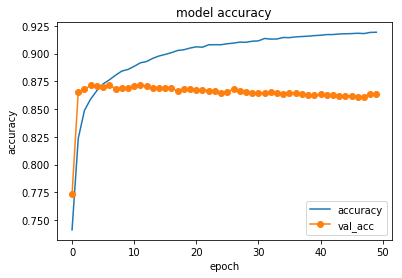

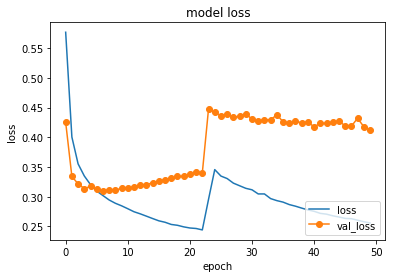

In [52]:
plot_history(history)

In [ ]:
#model_avg.save_weights('./params.hdf5')

In [ ]:
score=model.evaluate(x_test, y_test)

In [ ]:
print(score[0],score[1])

In [ ]:
print('h')